# Introduction to Deep Learning with PyTorch



In this notebook, we will introduce you to PyTorch, a highly-regarded open-source deep learning framework developed by Facebook AI Research. Renowned for its flexibility, user-friendly nature, and dynamic computational graph, PyTorch facilitates effortless debugging and experimentation for developers working with deep learning models. For additional reading and resources, visit the official PyTorch [website](https://pytorch.org/) and the PyTorch GitHub [repository](https://github.com/pytorch/pytorch).

Our exploration will begin with an examination of PyTorch's fundamental features, followed by a demonstration of how to create and manipulate Tensor objects – the core components of PyTorch. We will also cover a variety of algebraic operations, including matrix multiplication and elementwise multiplication, which play a vital role in constructing and training deep learning models. To further your understanding, consult the [PyTorch documentation](https://pytorch.org/docs/stable/index.html).

Next, we will dive into one of PyTorch's most powerful features, Autodifferentiation, also known as Autograd. This remarkable capability automates the process of calculating gradients of a neural network's parameters in relation to the loss function. In conjunction with Stochastic Gradient Descent and Backpropagation, Autograd is instrumental in training large machine learning models, enabling more efficient and precise model optimization. To learn more about Autograd, explore the [PyTorch Autograd tutorial](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html).

As we progress through this guide, we will also touch on the topic of utilizing a Graphics Processing Unit (GPU) with PyTorch. This integration can significantly accelerate the training process for large-scale models. To gain further insights into using GPUs with PyTorch, review the "CUDA semantics" section in the [PyTorch documentation](https://pytorch.org/docs/stable/notes/cuda.html).

Without further ado, let's ignite our journey into the world of PyTorch, and remember to explore the resources provided above for an even deeper understanding.

## Installation

To install PyTorch, you can use either pip or conda, depending on your preferred package manager. Before installing, it's important to determine whether you need a version that supports CPU only or one that supports both CPU and GPU (CUDA).

To choose the appropriate installation command, visit the PyTorch official website's ["Get Started" page](https://pytorch.org/get-started/locally/). You'll find a configuration widget that lets you select your preferred package manager, OS, Python version, and CUDA version (if needed).

After the installation is complete, you can verify that PyTorch has been successfully installed by running the following commands in your Python environment:

In [1]:
import torch
print(torch.__version__)

2.2.1+cu121


Let's also import other useful packages for this tutorial.

In [2]:
# display matplotlib plots inline in the Jupyter notebook
%matplotlib inline

# Import necessary packages
import torch  # deep learning library
from torch import nn
from torch.utils.data import DataLoader
import numpy as np
import matplotlib  # plotting library
import matplotlib.pyplot as plt
import pandas as pd  # data manipulation library
import seaborn as sns  # data visualization library
from cycler import cycler
from IPython.display import Video, Image  # display videos and images in Jupyter notebook

# Define the value of Pi for pytorch as it doesn't have a pre-defined value
torch_pi = 3.1415916

# -----------------------------------------------------------------------------
# Define some properties for plotting
import matplotlib.cm as cm
from matplotlib import rcParams

# Define a function to convert RGB values to matplotlib color
def rgb(r, g, b):
    return (float(r)/256., float(g)/256., float(b)/256.)

# Define the color cycle for plots
cb2 = [rgb(31, 120, 180), rgb(255, 127, 0), rgb(51, 160, 44), rgb(227, 26, 28),
       rgb(166, 206, 227), rgb(253, 191, 111), rgb(178, 223, 138), rgb(251, 154, 153)]

# Set some properties for figures and plots
rcParams['figure.figsize'] = (9, 7)  # figure size
rcParams['figure.dpi'] = 50  # figure resolution
rcParams['lines.linewidth'] = 2  # line width
rcParams['axes.prop_cycle'] = cycler('color', cb2)  # color cycle
rcParams['axes.facecolor'] = 'white'  # background color
rcParams['axes.grid'] = False  # display grid or not
rcParams['patch.facecolor'] = cb2[0]  # color for patches
rcParams['patch.edgecolor'] = 'white'  # color for patch edges
rcParams['font.size'] = 23  # font size
rcParams['font.weight'] = 300  # font weight

/home/suresh/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/suresh/.local/lib/python3.8/site-packages/pandas/core/arrays/masked.py:64: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (


--- 
## Tensor and PyTorch 

PyTorch predominantly utilizes tensors as its core data structure to encode various types of information, such as model inputs and outputs, along with model parameters. Tensors are multi-dimensional arrays that extend scalars, vectors, and matrices to encompass data in $N$-dimensions, allowing for the representation of diverse data structures from simple to highly complex forms.

To clarify further:

- Scalar (0-dimensional tensor): A single value, e.g., 1.0

- Vector (1-dimensional tensor): A one-dimensional array, e.g.,
$\begin{bmatrix}
1 \\
2
\end{bmatrix}$

- Matrix (2-dimensional tensor): A two-dimensional array, e.g.,
$\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix}$

- Tensor (n-dimensional tensor, $n > 2$): An N-dimensional array, e.g.,
$\begin{bmatrix}
[1, 2] & [3, 4] \\
[4, 5] & [6, 7]
\end{bmatrix}$

Tensors provide a flexible way to represent data across a broad range of dimensions, making them particularly valuable in deep learning and other intricate mathematical applications.

### Pytorch and Numpy

We will first explore the relationship between PyTorch and NumPy, two widely-used libraries for numerical computing in Python. While PyTorch is specifically designed for deep learning applications, NumPy is a general-purpose library for numerical operations. Despite their distinct purposes, PyTorch aims to maintain a similar API to NumPy, enabling users to transition effortlessly between the two libraries.

Moreover, we will demonstrate how to convert data between PyTorch tensors and NumPy arrays, which is beneficial when working with both libraries simultaneously in your projects.

It's crucial to note that when converting between PyTorch tensors and NumPy arrays, the underlying data is shared between them if the tensor is on the CPU. As a result, modifying one will impact the other. This design choice aids in conserving memory and minimizing the overhead of data copying.

### Converting a NumPy array to a PyTorch

In [3]:
# Create a NumPy array
numpy_array = np.array([[1, 2], [3, 4]])
print("Original NumPy array:\n", numpy_array)
print("")

# Convert NumPy array to PyTorch tensor
tensor_from_numpy = torch.from_numpy(numpy_array)
print("PyTorch tensor from NumPy array:\n", tensor_from_numpy)
print("")

# Modify NumPy array
numpy_array[0, 0] = 99
print("Modified NumPy array:\n", numpy_array)
print("")

# Observe the change in the PyTorch tensor
print("PyTorch tensor after modifying NumPy array:\n", tensor_from_numpy)


Original NumPy array:
 [[1 2]
 [3 4]]

PyTorch tensor from NumPy array:
 tensor([[1, 2],
        [3, 4]])

Modified NumPy array:
 [[99  2]
 [ 3  4]]

PyTorch tensor after modifying NumPy array:
 tensor([[99,  2],
        [ 3,  4]])


### Converting a PyTorch tensor to a NumPy array

In [4]:
# Create a PyTorch tensor
tensor = torch.tensor([[1, 2], [3, 4]])
print("Original PyTorch tensor:\n", tensor)
print("")

# Convert PyTorch tensor to NumPy array
numpy_array_from_tensor = tensor.numpy()
print("NumPy array from PyTorch tensor:\n", numpy_array_from_tensor)
print("")

# Modify PyTorch tensor
tensor[0, 0] = 99
print("Modified PyTorch tensor:\n", tensor)
print("")

# Observe the change in the Numpy array
print("NumPy array after modifying PyTorch tensor:\n", numpy_array_from_tensor)
print("")


Original PyTorch tensor:
 tensor([[1, 2],
        [3, 4]])

NumPy array from PyTorch tensor:
 [[1 2]
 [3 4]]

Modified PyTorch tensor:
 tensor([[99,  2],
        [ 3,  4]])

NumPy array after modifying PyTorch tensor:
 [[99  2]
 [ 3  4]]



---

We will now delve into various PyTorch tensor operations. Many of these operations are intentionally designed to resemble their NumPy counterparts, making it easier for developers to transition between the two libraries seamlessly.

### Tensor Creation

In [5]:
# Create a random tensor of size (2, 3)
rand_tensor = torch.rand(2, 3)
print("Random tensor:\n", rand_tensor)
print("")

# Create a tensor filled with ones, of size (2, 3)
ones_tensor = torch.ones(2, 3)
print("Ones tensor:\n", ones_tensor)
print("")

# Create a tensor filled with zeros, of size (2, 3)
zeros_tensor = torch.zeros(2, 3)
print("Zeros tensor:\n", zeros_tensor)
print("")

# Create a tensor with a range of values from 0 to 4
arange_tensor = torch.arange(5)
print("Arange tensor:\n", arange_tensor)


Random tensor:
 tensor([[0.2158, 0.8096, 0.1743],
        [0.2995, 0.5971, 0.6132]])

Ones tensor:
 tensor([[1., 1., 1.],
        [1., 1., 1.]])

Zeros tensor:
 tensor([[0., 0., 0.],
        [0., 0., 0.]])

Arange tensor:
 tensor([0, 1, 2, 3, 4])


### Concatenation

In [6]:
# Concatenate tensors along a dimension (dim=0 by default)
tensor_a = torch.tensor([[1, 2], [3, 4]])
tensor_b = torch.tensor([[5, 6], [7, 8]])
concatenated_tensor = torch.cat((tensor_a, tensor_b))
print("Concatenated tensor:\n", concatenated_tensor)

Concatenated tensor:
 tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])


### Reshaping

In [7]:
# Transpose a tensor
transposed_tensor = tensor_a.T
print("Transposed tensor:\n", transposed_tensor)
print("")

# Create a tensor with the same shape but filled with ones
one_like_tensor = torch.ones_like(tensor_a)
print("One-like tensor:\n", one_like_tensor)

Transposed tensor:
 tensor([[1, 3],
        [2, 4]])

One-like tensor:
 tensor([[1, 1],
        [1, 1]])


### Common Mathematical Operations

In [8]:
# Calculate the sum of a tensor's elements
sum_result = torch.sum(tensor_a)
print("Sum:\n", sum_result)
print("")

# Calculate the mean of a tensor's elements
mean_result = torch.mean(tensor_a.float())  # Requires float tensor
print("Mean:\n", mean_result)
print("")

# Calculate the L2-norm of a tensor
norm_result = torch.norm(tensor_a.float())  # Requires float tensor
print("Norm:\n", norm_result)
print("")

# Calculate the absolute values of a tensor
abs_result = torch.abs(tensor_b - 5)
print("Absolute values:\n", abs_result)


Sum:
 tensor(10)

Mean:
 tensor(2.5000)

Norm:
 tensor(5.4772)

Absolute values:
 tensor([[0, 1],
        [2, 3]])


### Matrix Operations

In [9]:
# Tensors
tensor_a = torch.tensor([1, 2, 3])
tensor_b = torch.tensor([4, 5, 6])

# Element-wise addition
add_result = tensor_a + tensor_b

# Element-wise subtraction
sub_result = tensor_a - tensor_b

# Element-wise multiplication
mul_result = tensor_a * tensor_b

# Element-wise division
div_result = tensor_a / tensor_b

# Print element-wise results
print("Addition:\n", add_result)
print("")

print("Subtraction:\n", sub_result)
print("")

print("Multiplication:\n", mul_result)
print("")

print("Division:\n", div_result)
print("")

# Matrix multiplication
mat_a = torch.tensor([[1, 2], [3, 4]])
mat_b = torch.tensor([[5, 6], [7, 8]])
matmul_result = mat_a@mat_b
print("Matrix multiplication:\n", matmul_result)
print("")

# Dot product
dot_result = torch.dot(tensor_a, tensor_b)
print("Dot product:\n", dot_result)


Addition:
 tensor([5, 7, 9])

Subtraction:
 tensor([-3, -3, -3])

Multiplication:
 tensor([ 4, 10, 18])

Division:
 tensor([0.2500, 0.4000, 0.5000])

Matrix multiplication:
 tensor([[19, 22],
        [43, 50]])

Dot product:
 tensor(32)


--- 

## Data Types in PyTorch

In this section of the tutorial, we will concentrate on the two main floating-point data types available in PyTorch: 32-bit floats (float32) and 64-bit floats (float64). Gaining a solid understanding of these data types and their characteristics is vital when working with tensors effectively, particularly when harnessing the power of GPU capabilities.

Float32, or single-precision floating-point numbers, are the most widely used data type in PyTorch for representing real numbers with decimal points. They strike a good balance between precision and memory consumption, making them suitable for the majority of deep learning applications. Most GPUs natively support float32, resulting in quicker computation. However, float32's precision is limited compared to float64, which may lead to numerical issues in certain situations.

Float64, or double-precision floating-point numbers, provide a higher level of precision than float32. However, this increased precision comes at the expense of greater memory consumption and slower computation, particularly on GPUs.

GPUs are optimized for parallel processing, which is highly advantageous for deep learning applications. Native GPU support for float32 is standard because it offers an optimal balance between precision and memory usage. Consequently, most deep learning frameworks, including PyTorch, default to using float32 for tensor operations, especially when executed on GPUs. This approach enables faster training and inference times while maintaining sufficient precision for the majority of use cases.

To specify the data type of a tensor, you can use the dtype argument when creating the tensor:

In [10]:
# Create a float32 tensor
float32_tensor = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float32)
print(float32_tensor.dtype)

# Create a float64 tensor
float64_tensor = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float64)
print(float64_tensor.dtype)

torch.float32
torch.float64


Understanding the various data types in PyTorch and their implications for computation and memory usage is crucial for building efficient deep learning models and leveraging GPU capabilities to their fullest extent.

---

## GPU Optimisation

In this section, we will explore how to utilize GPUs in PyTorch, specifically in the context of Google Colab. Google Colab provides free access to a GPU for accelerating deep learning tasks. We will discuss how to check if a GPU is being used, and how to transfer data between CPU and GPU memory.

Google Colab provides an environment where you can easily enable GPU support for your deep learning projects. To do this, navigate to the "Runtime" menu, select "Change runtime type," and choose "GPU" as the hardware accelerator. With this setup, you can leverage the power of GPUs for your PyTorch projects. You will also see below that we will refer GPU as CUDA.

CUDA (Compute Unified Device Architecture) is a parallel computing platform and programming model developed by NVIDIA for general-purpose computing on GPUs (Graphics Processing Units). CUDA allows developers to write programs that can take advantage of the massive parallel processing power of NVIDIA GPUs, which are particularly well-suited for tasks that involve a high degree of parallelism, such as deep learning and other scientific computations.

In the context of deep learning, CUDA plays a significant role in speeding up the training and inference processes by utilizing the parallel processing capabilities of NVIDIA GPUs. These GPUs are designed to handle thousands of lightweight threads simultaneously, which is a key factor in the efficient execution of deep learning algorithms that involve large amounts of matrix and tensor operations.

To use CUDA in deep learning frameworks like PyTorch, NVIDIA also provides cuDNN (CUDA Deep Neural Network library), which is a GPU-accelerated library for deep learning primitives. cuDNN optimizes the performance of standard deep learning routines, such as forward and backward propagation, convolution, pooling, normalization, and activation layers. All these are automatically included when you run Pytorch on GPU.

To check if a GPU is being used by PyTorch, you can use the torch.cuda module. This module provides a simple way to interact with the GPU and perform various operations. The following code demonstrates how to check for GPU availability and display GPU information:

In [11]:
# Check if a GPU is available and set the device accordingly
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)  # Print the device being used
print()

# Additional Info when using CUDA (GPU)
if device.type == 'cuda':  # If a GPU is being used
    print(torch.cuda.get_device_name(0))  # Print the GPU name

    print("Memory Usage:")  # Print memory usage information

    # Calculate and print the allocated GPU memory in GB
    print("Allocated:", round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    
    # Calculate and print the cached (reserved) GPU memory in GB
    print("Cached:", round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')
else:
    # If no GPU is available, inform the user that the CPU is being used
    print("No GPU available, using CPU instead.")


Using device: cpu

No GPU available, using CPU instead.


In the code above, 1024**3 is used to convert the memory usage values from bytes to gigabytes.

To move data from CPU memory to GPU memory, you can use the `to()` method or the `cuda()` method of a tensor. It is crucial to move both your model and the data to the GPU to fully benefit from GPU acceleration. The following code demonstrates how to move a tensor to the GPU.

You can check if a tensor is on the GPU by using the `is_cuda` attribute of the tensor. The is_cuda attribute returns a boolean value, indicating whether the tensor is stored in GPU memory or not. Here's an example:


In [12]:
# Create a tensor in CPU memory
tensor_cpu = torch.zeros((10, 10))

# Check if tensor is on GPU
print("Is tensor on GPU (CPU tensor)?", tensor_cpu.is_cuda)

# Move the tensor to GPU memory
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tensor_gpu = tensor_cpu.to(device)

# Check if tensor is on GPU (after moving it to GPU memory)
print("Is tensor on GPU (GPU tensor)?", tensor_gpu.is_cuda)


Is tensor on GPU (CPU tensor)? False
Is tensor on GPU (GPU tensor)? False


Keep in mind that you should move both your model and the data to the GPU before performing any operations on them.

By understanding how to utilize GPUs in PyTorch, especially in the context of Google Colab, you can accelerate your deep learning projects and optimize your models' performance.

---

## On Optimization and Gradient Descent

Now, we delve into the core concept that underlies stochastic gradient descent (SGD), a widely employed optimization technique for training large-scale machine learning models. Our exploration begins with an overview of Gradient Descent, which lays the foundation for understanding the advantages of SGD in managing the training of massive architectures. 

Subsequently, we shift our attention to the autodifferentiation and backpropagation algorithm, an essential mechanism that empowers neural networks to learn effectively.

Let us start with a very simple example of trying to find the minimum of the function
$f: \mathbb{R} \rightarrow \mathbb{R}$, where:
$$
f(x) = x^2
$$

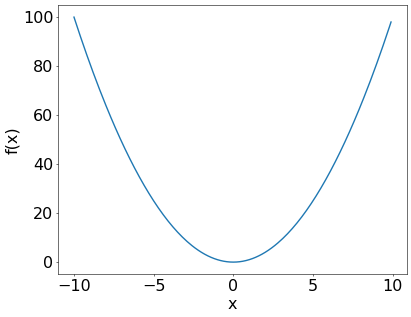

In [13]:
import matplotlib.pyplot as plt
def f(x):  # Objective function
    return x ** 2

x = np.arange(-10, 10, 0.1)

plt.plot(x, f(x))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


In general, finding the local minima of more complicated functions, especially in the multivariate case, can be quite challenging. Fortunately, numerical methods such as the classical and powerful gradient descent come to our aid, forming the foundation for highly effective optimization algorithms that help manage the training of large-scale deep learning models.

In essence, gradient descent enables us to find the minimum of a function by descending the slope and making meaningful moves in the direction of steepest descent, which is given by the negative of the gradient, until this process converges. Intuitively, when you no longer make significant progress with each new step, within a certain sensitivity, you have reached the minimum.

Gradient descent consists of three main components:

- Initializing a value for our parameters.

- Updating our parameters in the opposite direction of the gradient with the learning rate determining the size of the jump. 

- Continuing to jump for a pre-defined number of steps, as gradient descent is guaranteed to converge to the global minimum for convex surfaces and to a local minimum for non-convex surfaces.

Formally, we can express gradient descent (GD) as:

$$
x_{k+1} = x_k - \eta_{k} \nabla f(\mathbf{x}),
$$

Here, $\eta$ represents the learning rate, which can be fixed or dynamic (i.e., changing at each step), denoted by $\eta_{k}$.

Let's now implement the 1D case for our simple yet elegant function, $f(x) = x^2$. In this case, we know analytically that the gradient $f'(x) = 2x$

In [14]:
def f_grad(x):  
    # Gradient (derivative) of the objective function
    return 2 * x 

def lr(k):
    # Function that returns the learning rate at iteration k
    return 0.2

def gd(f_grad):
    # Gradient descent function
    max_iter = 100
    x = 10.0
    results = [x]
    
    for k in range(0, max_iter):
        # Compute gradient at current point
        g = f_grad(x) 
        
        # Compute learning rate at current iteration
        eta = lr(k)
        
        # Perform update using gradient and learning rate
        x = x - eta * g 
        
        # Store updated point
        results.append(float(x))
        
        # Print iteration information
        if k % 10 == 0:
            print(f'epoch k = {k:.0f}, x: {x:f}')
        
    return results

# Call the gradient descent function with the objective function's gradient
results = gd(f_grad)


epoch k = 0, x: 6.000000
epoch k = 10, x: 0.036280
epoch k = 20, x: 0.000219
epoch k = 30, x: 0.000001
epoch k = 40, x: 0.000000
epoch k = 50, x: 0.000000
epoch k = 60, x: 0.000000
epoch k = 70, x: 0.000000
epoch k = 80, x: 0.000000
epoch k = 90, x: 0.000000


Most machine learning tasks are reminiscent to the simple example above, where we aim to minimize a cost function (or a loss function) that represents the difference between the predicted output $f(x_i; \theta)$ and the actual output $y_i$, where $x_i$ are the input data (e.g., images) and $\theta$ are the model parameters we aim to optimize. The loss function $L(\theta)$ is defined as:

$$
L(\theta) = \dfrac{1}{n} \sum_{i=1}^n \ell(y_i, f(x_i; \theta))
$$

where $n$ is the number of training samples, $y_i$ is the true output for input $x_i$, and $f(x_i; \theta)$ is the predicted output for input $x_i$ using the current model parameters $\theta$. The goal of the optimization algorithm is to find the optimal set of parameters $\theta$ that minimizes the loss function $L(\theta)$. Since we have multiple data entries, the total "best" gradient would be the average of the gradients over all the data entries.

### Stochastic Gradient Descent

However, if the number of training samples $n$ is very large (e.g., a billion data points), computing the gradient of the loss function for all training samples at once can be computationally expensive. This is where stochastic gradient descent (SGD) comes in.

The main idea of SGD is to use a subset of the training samples to compute an approximation of the gradient of the loss function at each iteration. Specifically, at each iteration $k$, we randomly select a small subset of training samples (usually referred to as a "mini-batch") and use these samples to compute an approximation of the gradient of the loss function. The mini-batch gradient is then used to update the model parameters as follows:

$$
\theta_{k+1} = \theta_k - \eta_k \nabla L(\theta_k; x_{i:i+b-1}, y_{i:i+b-1})
$$

where $b$ is the mini-batch size, $\eta_k$ is the learning rate at iteration $k$, and $\nabla L(\theta_k; x_{i:i+b-1}, y_{i:i+b-1})$ is the gradient of the loss function with respect to the model parameters $\theta_k$ computed using the mini-batch of training samples $(x_{i:i+b-1}, y_{i:i+b-1})$.

The main advantage of SGD over gradient descent (GD) is that it requires less memory and computational resources, making it more suitable for large-scale machine learning problems. However, SGD also has some disadvantages. Since the mini-batches are selected randomly, the stochasticity of the algorithm can result in high variance and slow convergence of the optimization process. Also, the learning rate $\eta_k$ needs to be carefully tuned to ensure convergence of the algorithm.

### Autodifferentiation

While optimizing a machine learning model (which we will see more advanced examples of in notebook 2-4) might seem conceptually simple, i.e., we can simply perform gradient descent by differentiating the loss function $L(\theta)$ to find the best model that fits the data, the main challenge here is how we can calculate the gradient. In the simple example $f(x) = x^2$ above, this is straightforward, because we know the analytic closed form of the differentiation. However, for a very complex neural network (i.e., a very complicated function), analytically writing down the analytic gradient can be very difficult. And this is where modern machine learning frameworks such as PyTorch, TensorFlow, and JAX come to the rescue.

The central component of any machine learning framework is what we call autodifferentiation, which is performed through the backpropagation algorithm. At its core, backpropagation is based on the chain rule of differentiation, which allows us to compute the derivative of a function composed of simpler functions. This makes differentiation a simpler process compared to integration, which is why backpropagation is an effective method for optimizing deep neural networks.

But before we dive deeper into backpropagation, let's discuss the different methods of differentiation.

There are three common methods to perform differentiation: **finite differences**, **symbolic differentiation**, and **autodifferentiation**.

Finite difference is a numerical method of approximating the derivative of a function by calculating the difference between function values at two nearby points. Although simple to implement, it can be computationally expensive and imprecise, especially for high-dimensional functions. The computational complexity of this method is proportional to the number of dimensions squared.

Symbolic differentiation, on the other hand, involves deriving the mathematical formula for the derivative of a function using algebraic manipulation of the function's equation, such as the one implemented in Mathematica. This method is precise and exact, but it can be complex and time-consuming, especially for functions with many variables or complex expressions. Symbolic differentiation has a fixed computational complexity that depends on the complexity of the function being differentiated.

In contrast to finite differences and symbolic differentiation, **autodifferentiation** is a powerful technique that enables us to compute gradients automatically, without having to manually derive and implement the gradients. In other words, we can focus on specifying the structure of the neural network and defining the loss function, and the framework takes care of the differentiation for us. This greatly simplifies the process of designing and training deep neural networks, and allows us to experiment with more complex architectures and loss functions.

Another advantage of autodifferentiation is that it allows us to compute gradients efficiently, which is crucial for large-scale machine learning problems. In addition, many frameworks provide support for distributed training, which allows us to train deep neural networks on clusters of GPUs or TPUs, further accelerating the training process.

One downside of autodifferentiation is that it is completely numerical, and hence it would not yield any analytic closed form. However, for most cases in machine learning, where the goal is to numerically update the model parameters, this limitation is not critical.

---

## Backpropagation and Chain Rule

To understand how backpropagation works, let's consider a slightly more nontrivial example where input vector $x$ and produces an output $h$ using a linear transformation followed by a sigmoid activation function:

$$
z = Wx + b,
$$

$$
h = \sigma(z) = \dfrac{1}{1+e^{-z}},
$$

where $W$ is a weight matrix, $b$ is a bias vector, and $\sigma$ is the sigmoid function.

Our goal is to optimize the parameters $W$ and $b$ to best fit the data. Given a single data point $(x,y)$, we use the mean squared error (MSE) loss function:

$$
\ell(W,b|x,y) = (y - \sigma(Wx + b))^2.
$$

Our aim is to calculate the gradients of the loss function with respect to the parameters $W$ and $b$, which will allow us to update the parameters using gradient descent.

The chain rule states that if we have a function $\ell$ that is composed of several simpler functions then the derivative of $\ell$ with respect to $W$ is given by the product of the derivatives of the simpler functions with respect to $W$. In other words,

$$
\dfrac{\partial \ell}{\partial W} = \dfrac{\partial \ell}{\partial h} \dfrac{\partial h}{\partial z} \dfrac{\partial z}{\partial W},
$$

and

$$
\dfrac{\partial \ell}{\partial b} = \dfrac{\partial \ell}{\partial h} \dfrac{\partial h}{\partial z} \dfrac{\partial z}{\partial b},
$$

where $\dfrac{\partial h}{\partial z}$ is the differentiation of the sigmoid function

$$
\dfrac{\partial h}{\partial z}  = \dfrac{\partial \sigma}{\partial z} = \sigma(z)(1-\sigma(z)),
$$

and $\dfrac{\partial z}{\partial W} = x$, $\dfrac{\partial z}{\partial b} = 1$, and

$$
\dfrac{\partial \ell}{\partial h} = 2 (y - h).
$$

While all these calculations might seem straightforward, what PyTorch does implicitly is that it calculates the loss for all input pairs $\{x_i,y_i\}$ in batch, and therefore is able to calculate the gradients in parallel and take the mean of a batch of inputs, which is critical for stochastic gradient descent. 

### Forward and Backward Passing

It is worth noting that the term $\dfrac{\partial \ell}{\partial h}$ can be shared for the calculation of $\dfrac{\partial \ell}{\partial W}$ and $\dfrac{\partial \ell}{\partial b}$. Therefore, if we are smart algorithmically, we need only calculate this term once and reuse it. This leads to the first key concept of autodiff, which is known as dynamic programming, i.e., we algorithmically collect all the terms that is needed to calculate both the outputs and all the intermediate differentiations. And this is done with a "forward pass" to calculate the output, and then a "backward pass" to collect all the intermediate differentiations.

Algorithmically, for the forward passing: 

- Initialize the weights and biases $W$ and $b$.

- Pass the input $x$ through the linear transformation $Wx + b$ to obtain $z = W x + b$.

- Apply the sigmoid activation function to $z$ to obtain the output $h = \sigma(z)$.

- Calculate the loss $\ell$.

Now, let's move on to the backward pass:

- Calculate the derivative of the loss function $\ell$ with respect to the output $h$: $\dfrac{\partial \ell}{\partial h} = 2 (y - h)$.

- Calculate the derivative of $h$ with respect to $z$: $\dfrac{\partial h}{\partial z} = \sigma(z)(1-\sigma(z))$.

- Calculate the derivative of the loss function with respect to $z$: $\dfrac{\partial \ell}{\partial z} = \dfrac{\partial \ell}{\partial h} \dfrac{\partial h}{\partial z}$.

- Calculate the derivative of $z$ with respect to $W$: $\dfrac{\partial z}{\partial W} = x$.

- Calculate the derivative of $z$ with respect to $b$: $\dfrac{\partial z}{\partial b} = 1$.

- Calculate the derivative of the loss function with respect to $W$: $\dfrac{\partial \ell}{\partial W} = \dfrac{\partial \ell}{\partial z} \dfrac{\partial z}{\partial W}$.

- Calculate the derivative of the loss function with respect to $b$: $\dfrac{\partial \ell}{\partial b} = \dfrac{\partial \ell}{\partial z} \dfrac{\partial z}{\partial b}$.

During the forward pass, PyTorch builds a computation graph by tracking all the operations performed on the input data. Each node in the graph represents a tensor, and each edge represents an operation that transforms one tensor into another. The computation graph is then used during the backward pass to compute gradients of the loss function with respect to the input tensors.

During the backward pass, PyTorch first sets the gradient of the loss function with respect to the final output tensor to 1. Then, starting from the final output tensor, PyTorch uses the computation graph to compute the gradients of the loss function with respect to all the input tensors. This is done by applying the chain rule of differentiation to each operation in the computation graph.

For example, consider the computation graph for the simple example of backpropagation we have been discussing. The computation graph would look be:

$$
x \overset{(W,b)}{\longrightarrow} z \rightarrow h \rightarrow \ell
$$

where each arrow represents an operation, and the direction of the arrow indicates the flow of data.

And for the backward pass, propagate from the end point back to the original leaf to avoid any redundant calculation of intermediate differentiations and ensure that all the input needed in the intermediate steps have been calculated.
$$
1 \rightarrow \dfrac{\partial \ell}{\partial h} \rightarrow \dfrac{\partial \ell}{\partial z} \rightarrow \bigg(\dfrac{\partial \ell}{\partial W}, \dfrac{\partial \ell}{\partial b} \bigg)
$$

Once we have calculated the gradients, we can update the parameters using gradient descent, taking the mean gradient of the individual batches.

### Other Advantages of Backpropagation

In addition to its memory-efficient dynamic programming capabilities, collecting gradients through backpropagation has two more advantages. Firstly, backpropagation works for any parameter, even if they are in the middle of the computational graph. In the example discussed earlier, the parameters $W$ and $b$ are leaf nodes, which are at the entry point of the entire computational graph. However, in more complex neural networks, parameters can be located anywhere in the graph, and backpropagation can still be used to compute their gradients.

Secondly, the gradient Jacobian matrix tends to have a lower dimension at the output layer, where the loss function is a scalar value. This makes the backpropagation algorithm more efficient as it avoids massive matrix multiplication. However, the dimensions of the individual Jacobian matrices and the computational complexity of backpropagation can vary depending on the complexity of the neural network being used.

It is important to note that backpropagation is not limited to the simple example discussed earlier. It can be applied to neural networks with any number of layers and any activation functions. The only difference is that the computation graph becomes more complex, with more nodes and edges, and the chain rule of differentiation needs to be applied recursively to each node in the graph. With the help of modern machine learning frameworks such as PyTorch, TensorFlow, and JAX, backpropagation has become a powerful tool for optimizing deep neural networks.

---

## Implementation in Pytorch

Backpropagation is a powerful technique that allows us to compute gradients of complex functions automatically, without having to manually derive and implement the gradients. As long as the operators in the function are all analytic and differentiable, we can in principle calculate the gradients of arbitrary complex functions using backpropagation.

To demonstrate how backpropagation works in practice, let's revisit the simple example of $f(x) = x^2$. We want to compute the gradient of this function with respect to the input x, which is simply $f'(x) = 2x$. We can implement this function in PyTorch as follows:

In [15]:
def f(x):
    # Define function
    return x**2

x = torch.tensor([2.0], requires_grad=True) # Define input variable
y = f(x) # Compute function value
y.backward() # Compute gradients with respect to x

print(x.grad) # Output gradient

tensor([4.])


In the code, the input variable $x$ is defined as a PyTorch tensor with `requires_grad=True`. The `requires_grad` attribute of the tensor indicates that we want to compute gradients with respect to $x$. The function $f(x)$ is defined as $x^2$, and the value of the function at $x$ is computed using $y = f(x)$.

The `backward()` method is then called on $y$ to compute the gradient of $y$ with respect to $x$. Backpropagation is automatically performed by PyTorch, and the gradient is computed using the chain rule of differentiation. Although for this simple function, the chain rule is not needed.

Once we have the gradient, we can use it to find the minimal point of the function. This is typically done using an optimization algorithm such as gradient descent. In gradient descent, the gradient is used to update the value of $x$ in the direction that minimizes the function. The `lr` variable in the previous code snippet corresponds to the learning rate of the gradient descent algorithm, which determines the step size of each update.

In [16]:
# Objective function we want to minimize
def objective_function(x):
    return x**2

# Gradient descent function using PyTorch
def gd_pytorch(objective_function, lr=0.2, max_iter=100):
    
    # Initialize x
    x = torch.tensor([10.0], requires_grad=True)
    results = [x.item()]
    
    for k in range(max_iter):
        
        # Compute objective function at current point
        f = objective_function(x)
        
        # Compute gradient of objective function with respect to x
        f.backward()
        
        # Perform update using gradient and learning rate
        with torch.no_grad():
            x -= lr * x.grad
        
        # Clear gradient for next iteration
        x.grad.zero_()
        
        # Store updated point
        results.append(x.item())
        
        # Print iteration information
        if k % 10 == 0:
            print(f'epoch k = {k:.0f}, x: {x.item():f}')
        
    return results

# Call the gradient descent function with the objective function
results = gd_pytorch(objective_function)

epoch k = 0, x: 6.000000
epoch k = 10, x: 0.036280
epoch k = 20, x: 0.000219
epoch k = 30, x: 0.000001
epoch k = 40, x: 0.000000
epoch k = 50, x: 0.000000
epoch k = 60, x: 0.000000
epoch k = 70, x: 0.000000
epoch k = 80, x: 0.000000
epoch k = 90, x: 0.000000


We indeed find the minimal point at $x=0$.

In the loop, compute the objective function at the current point, then use `backward()` method to compute the gradient of the objective function with respect to $x$. Perform the update using the computed gradient and learning rate inside the `torch.no_grad()` context manager to avoid building a computation graph during the update. Clear the gradient for the next iteration using `x.grad.zero_()`.

In PyTorch, when we perform an operation on a tensor, PyTorch keeps track of the computation graph that was used to compute the output tensor. This graph is then used during the backward pass to compute the gradients of the output tensor with respect to the input tensors.

However, sometimes we want to perform operations that should not be tracked by the computation graph, such as when we are updating the parameters of a model during training. This is where the `torch.no_grad()` context manager comes in handy.

When we wrap a block of code with `torch.no_grad()`, any operations that are performed within that block are not tracked by the computation graph. This is useful when we want to compute the output of a model without updating its parameters. In the context of the gradient descent algorithm, we want to update the value of the input tensor without building a computation graph for the update operation, so we wrap the update operation with `torch.no_grad()`.

Similarly, in the line `x.grad.zero_()`, we are zeroing out the gradients of the input tensor $x$. This is necessary because PyTorch accumulates gradients by default, meaning that if we call `backward()` multiple times on the same tensor, the gradients will be accumulated. This is useful in some cases, but in our case, we want to compute the gradient of the objective function with respect to the input tensor for each iteration of the gradient descent algorithm, so we need to zero out the gradient at the beginning of each iteration using `x.grad.zero_()`. This ensures that the gradient computed in the previous iteration does not affect the gradient computed in the current iteration.

---

## A Slightly More Complicated Example

Let's try to go beyond this simple example and let's fit the sigmoid function as we discussed above. First, we'll generate a mock dataset with `torch.randn` for the input $x$ and compute the corresponding output $y$ using the sigmoid function. We'll also add some noise to $y$ to make the problem more interesting.

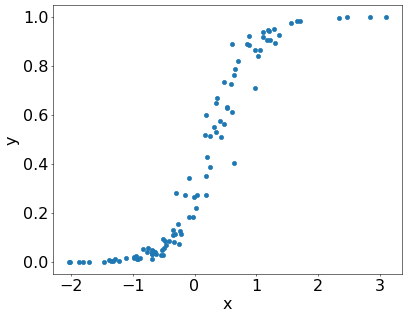

In [17]:
# Generate mock dataset
n = 100
x = torch.randn(n, 1)
y = torch.sigmoid(3*x - 1 + 0.5*torch.randn(n, 1))
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Next, we'll define the sigmoid function as a PyTorch module, which will allow us to easily optimize its parameters using autodifferentiation and backpropagation.

In [18]:
class Sigmoid(torch.nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return torch.sigmoid(x)

We'll initialize the parameters of the sigmoid function W and b with random values using torch.randn. We'll also set `requires_grad=True` for both parameters so that we can compute gradients with respect to them.

In [19]:
# Initialize parameters with random values
W = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

Next, we'll define the objective function as the mean squared error between the predicted output $y_{pred}$ and the actual output $y$. We'll use the Sigmoid module to compute the predicted output $y_{pred}$ from the input $x$ and the parameters $W$ and $b$.

In [20]:
# Define objective function
criterion = torch.nn.MSELoss()
sigmoid = Sigmoid()

def objective_fn(W, b):
    y_pred = sigmoid(W*x + b)
    loss = criterion(y_pred, y)
    return loss

We will optimize the parameters $W$ and $b$ using gradient descent.

In [22]:
max_iter = 10000
lr = 0.1

results = []
for i in range(max_iter):
    loss = objective_fn(W, b)
    if i % 500 == 0:
        print(f'epoch {i}, loss: {loss.item():.4f}')
    loss.backward()
    with torch.no_grad():
        W -= lr * W.grad
        b -= lr * b.grad
        W.grad.zero_()
        b.grad.zero_()
    results.append((W.item(), b.item()))

epoch 0, loss: 0.2327
epoch 500, loss: 0.0101
epoch 1000, loss: 0.0061
epoch 1500, loss: 0.0051
epoch 2000, loss: 0.0047
epoch 2500, loss: 0.0045
epoch 3000, loss: 0.0044
epoch 3500, loss: 0.0043
epoch 4000, loss: 0.0043
epoch 4500, loss: 0.0043
epoch 5000, loss: 0.0043
epoch 5500, loss: 0.0043
epoch 6000, loss: 0.0043
epoch 6500, loss: 0.0043
epoch 7000, loss: 0.0043
epoch 7500, loss: 0.0043
epoch 8000, loss: 0.0043
epoch 8500, loss: 0.0043
epoch 9000, loss: 0.0043
epoch 9500, loss: 0.0043


Finally, we can plot the predicted output of the optimized sigmoid function along with the original data to see how well the model fits.

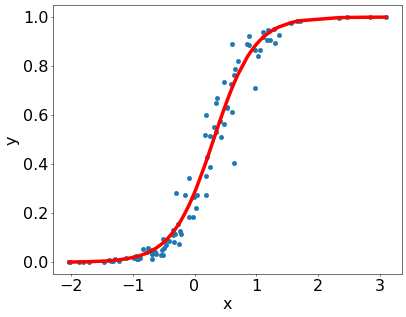

In [23]:
# Plot predicted output of optimized sigmoid function
W_opt, b_opt = results[-1]
y_pred_opt = sigmoid(W_opt*x + b_opt)
plt.scatter(x, y)
sorted_indices = x.squeeze().sort()[1]
plt.plot(x[sorted_indices], y_pred_opt[sorted_indices], color='red', lw=5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The resulting plot should show the original data points along with a red line representing the predicted output of the optimized sigmoid function. The goal of the optimization is to find the values of $W$ and $b$ that minimize the mean squared error between the predicted output and the actual output. By visual inspection, we can see that the optimized sigmoid function fits the data quite well.

Finally, instead of writing our own gradient descend codes, we can also employ the PyTorch optimization `torch.optim` module, which will make this example much more concise.

In [24]:
import torch.optim as optim

# Generate mock dataset
x = torch.randn(100, 1)
y = torch.sigmoid(2*x - 1)

#------------------------------------------------
# define sigmoid model
class SigmoidModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

model = SigmoidModel()

# Define the loss function
criterion = nn.MSELoss()

#------------------------------------------------
# Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
for epoch in range(5000):
    # Zero the gradients
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(x)
    loss = criterion(outputs, y)
    
    # Backward pass
    loss.backward()
    
    # Update weights
    optimizer.step()

    # Print progress
    if (epoch+1) % 100 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')
        
#------------------------------------------------
# retrieve optimized parameters
w_opt, b_opt = model.linear.weight.item(), model.linear.bias.item()

# print optimized parameters
print(f'Optimized parameters: W = {w_opt:.4f}, b = {b_opt:.4f}')

Epoch 100, Loss: 0.0261
Epoch 200, Loss: 0.0081
Epoch 300, Loss: 0.0042
Epoch 400, Loss: 0.0027
Epoch 500, Loss: 0.0018
Epoch 600, Loss: 0.0013
Epoch 700, Loss: 0.0010
Epoch 800, Loss: 0.0007
Epoch 900, Loss: 0.0005
Epoch 1000, Loss: 0.0004
Epoch 1100, Loss: 0.0003
Epoch 1200, Loss: 0.0002
Epoch 1300, Loss: 0.0002
Epoch 1400, Loss: 0.0002
Epoch 1500, Loss: 0.0001
Epoch 1600, Loss: 0.0001
Epoch 1700, Loss: 0.0001
Epoch 1800, Loss: 0.0001
Epoch 1900, Loss: 0.0000
Epoch 2000, Loss: 0.0000
Epoch 2100, Loss: 0.0000
Epoch 2200, Loss: 0.0000
Epoch 2300, Loss: 0.0000
Epoch 2400, Loss: 0.0000
Epoch 2500, Loss: 0.0000
Epoch 2600, Loss: 0.0000
Epoch 2700, Loss: 0.0000
Epoch 2800, Loss: 0.0000
Epoch 2900, Loss: 0.0000
Epoch 3000, Loss: 0.0000
Epoch 3100, Loss: 0.0000
Epoch 3200, Loss: 0.0000
Epoch 3300, Loss: 0.0000
Epoch 3400, Loss: 0.0000
Epoch 3500, Loss: 0.0000
Epoch 3600, Loss: 0.0000
Epoch 3700, Loss: 0.0000
Epoch 3800, Loss: 0.0000
Epoch 3900, Loss: 0.0000
Epoch 4000, Loss: 0.0000
Epoch 410

We can also explore the `grad_fn` attribute of a PyTorch tensor, which provides information about the operation that was performed to produce the tensor, as well as its inputs. We can use the `next_functions` attribute to explore the graph further by following the edges backwards.

In [25]:
print(loss.grad_fn)  # should print "MseLossBackward()"
print(loss.grad_fn.next_functions[0][0])  # should print "SigmoidBackward()"
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # should print "AddmmBackward()"
print(loss.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0])  # should print "AccumulateGrad()"

Each of these objects represents the operation that was performed on the tensor to produce the current node in the computation graph.

The first object, `MseLossBackward0`, represents the backward pass of the mean squared error loss. This object computes the gradient of the loss with respect to its inputs, which in this case is the output of the sigmoid function.

The second object, `SigmoidBackward0`, represents the backward pass of the sigmoid function. This object computes the gradient of the sigmoid function with respect to its inputs, which in this case is the weighted sum of the input features.

The third object, `AddmmBackward0`, represents the backward pass of the linear transformation ($x \rightarrow Wx + b$). This object computes the gradient of the linear transformation with respect to its inputs, which in this case is the input features.

The fourth object, `AccumulateGrad`, represents the accumulation of gradients during the backward pass. This object is used to accumulate gradients from multiple backward passes, which is necessary when performing gradient descent over an ensemble of data points.

By examining the `grad_fn` attributes of the tensors in the computation graph, we can trace back the operations that were performed on the inputs to produce the output, and we can use this information to compute the gradients of the parameters with respect to the loss function.

---

## Summary

We've learned in this tutorial:

- **Pytorch basics**: We learned the basics of Pytorch and its connection with NumPy. Pytorch is a Python-based scientific computing package that allows us to perform numerical operations using GPUs, which can significantly speed up computation. Pytorch is built on top of the Torch library and offers a wide range of tools for building and training machine learning models.

- **GPU acceleration**: We learned how to accelerate our computations using GPUs in Pytorch. Pytorch has a CUDA backend that allows us to utilize GPUs to speed up computations, especially for large-scale machine learning problems.

- **Gradient descent**: We learned about gradient descent, which is an optimization algorithm used to minimize a cost function by iteratively adjusting the parameters of a machine learning model. We discussed stochastic gradient descent and how they are used in practice.

- **Autodifferentiation and backpropagation**: We learned about autodifferentiation and backpropagation, which are key techniques for computing gradients in Pytorch. Autodifferentiation allows us to compute gradients automatically without having to derive them manually, while backpropagation allows us to efficiently propagate gradients backward through a computational graph.

- **Pytorch implementation**: We learned how to implement gradient descent, autodifferentiation, and backpropagation in Pytorch using various functions and modules. We also learned how to use Pytorch's built-in optimization functions and tools, such as the torch.optim module.

Overall, this tutorial provided a comprehensive introduction to Pytorch and its applications in machine learning. Armed with this knowledge, we can now start building more complex models and experimenting with different neural network architectures in the following tutorials.

---

## Bonus : Implementy Autodifferentiation and Backpropagation Using Only Numpy

(credit: Part of the codes here are adapted from a tutorial in [COMP4670/8600](https://www.sml2023.com/) that I taught, prepared by tutor Chamin Hewa Koneputugodage)

We've demonstrated that PyTorch can make complex neural networks modular and easy to optimize through backpropagation. Central to any autodifferentiation package like PyTorch is the ability to store not only the output value of a function in a computational graph but also the derivatives of that function with respect to the input variables. This is why, in PyTorch, when we set `required_grad=True`, the size of the array doubles to store not just the output but also the local gradients. During backpropagation, these local gradients are used to iteratively calculate all the gradients within the computational graph.

While the concept may seem straightforward, the implementation details can be quite intricate. However, it is possible to build backpropagation functionality and neural networks using only Numpy, albeit with less optimization compared to PyTorch. We'll use the Sigmoid example from before and build individual layers for the computational nodes, including the automatic storage of gradients.

By understanding the details below, you'll gain a deeper understanding of backpropagation.

First, let's implement the fully connected layer, which performs the operation $\mathbf{y} = \mathbf{W} \cdot \mathbf{x} + \mathbf{b}$. In PyTorch, this layer is referred to as a Linear layer. The fully connected layer is a fundamental component of most neural networks, as it connects the input and output neurons within and between layers. It is responsible for transforming the input data using weights $\mathbf{w}$ and biases $\mathbf{b}$ to produce the output $\mathbf{y}$.

The weights and biases are learnable parameters that are adjusted during the training process to minimize the loss function. In a fully connected layer, each output neuron is connected to every input neuron, allowing the layer to learn complex patterns and relationships in the input data.

In [26]:
# Constructor for the FullyConnectedLayer class
class FullyConnectedLayer():
    def __init__(self, in_features, out_features):
        self.in_features = in_features  # Number of input features
        self.out_features = out_features  # Number of output features
        self.weight = np.zeros((in_features, out_features))  # Weight matrix: W
        self.bias = np.zeros((out_features, 1))  # Bias vector: b
        self.g_weight = np.zeros((in_features, out_features))  # Gradient of weight matrix: dy/dW
        self.g_bias = np.zeros((out_features, 1))  # Gradient of bias vector: dy/db
        self.input = None  # Placeholder for input data

    # Initialize the weights and biases with random values
    def init_weights(self):        
        self.weight = np.random.randn(self.in_features, self.out_features)
        self.bias = np.random.rand(self.out_features, 1)

    # Perform forward pass through the layer
    def forward_pass(self, X):        
        self.input = X  # Store input data: x
        out = np.dot(X, self.weight) + self.bias.T  # Compute the output: y(x|W,b)
        return out
        
    # Perform backward pass through the layer
    # Note that g_next_layer is the gradient from the future layer
    # recall from the lecture that the gradient for the current layer take into account the gradient from the future layer
    # by the chain rule (matrix multiplication)
    def backward_pass(self, g_next_layer):
        self.g_weight = np.dot(self.input.T, g_next_layer)  # Compute gradient of weight matrix
        self.g_bias = np.sum(g_next_layer, axis=0, keepdims=True)  # Compute gradient of bias vector
        g_last_layer = np.dot(g_next_layer, self.weight.T)  # Compute gradient of the input data for the current layer: dy/dx
        return g_last_layer # we return the graident of the input data for the current layer so that it can be used in the previous layer

    # Update weights and biases using the computed gradients
    def update(self, learning_rate):
        self.weight -= learning_rate*self.g_weight  # Update weight matrix
        self.bias -= learning_rate*self.g_bias.T  # Update bias vector


Now let's implement sigmoid function and sigmoid layer.

In [27]:
# Sigmoid activation function
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

# Constructor for the Sigmoid class
class Sigmoid():
    def __init__(self):
        self.input = None  # Placeholder for input data
        self.ctx = None  # Placeholder for output of the sigmoid function

    # Perform forward pass through the sigmoid activation function
    def forward_pass(self, X):
        self.input = X  # Store input data
        self.ctx = sigmoid(X)  # Apply sigmoid function and store the result
        return self.ctx

    # Perform backward pass through the sigmoid activation function
    def backward_pass(self, g_next_layer):

        # Compute the derivative of the sigmoid function, while taking into account the gradient from the future layer
        # recall that the gradient of the sigmoid function is: dsigma/dx = sigma(x) * (1 - sigma(x))
        g_last_layer = self.ctx * (1 - self.ctx) * g_next_layer
        return g_last_layer

    # No update needed for the Sigmoid activation function,
    # since it does not have any parameters to update
    def update(self, learning_rate):
        pass

Now let's implement MSE loss.

In [28]:
# Constructor for the MeanSquaredErrorLoss class
class MSELoss():
    def __init__(self):
        self.input_y = None  # Placeholder for input predictions
        self.input_t = None  # Placeholder for input targets: y_true
        self.input_N = None  # Placeholder for batch size 

    # Perform forward pass through the MSE loss function
    def forward_pass(self, y, t):
        if len(t.shape) == 1:
            t = t[:, None]  # Reshape targets if necessary

        self.input_y = y  # Store input predictions
        self.input_t = t  # Store input targets
        self.input_N = y.shape[0]  # Store batch size

        loss = (y - t)**2  # Calculate squared error for each prediction and target

        return np.mean(loss)  # Return the mean of the loss
    
    # Perform backward pass through the MSE loss function
    def backward_pass(self, g_next_layer = 1):

        # Compute gradient of the MSE loss function, while taking into account the gradient from the future layer
        # recall that the gradient of the MSE loss function is: dMSE/dy = 2 * (y - t)
        # the 1/N factor is because we are using the mean of the loss 
        # and when we sum up the gradients in stochastic gradient descent, we need to divide by the batch size
        g_last_layer = 2 * (self.input_y - self.input_t) / self.input_N * g_next_layer
        return g_last_layer

    # No update needed for the MSE loss function, so this method is a placeholder
    def update(self, learning_rate):
        pass

Now that we have created the essential building blocks, we can combine them to create a simple (one-layer) yet functional neural network. This network will be based on the Sigmoid example we discussed earlier. The neural network will consist of a fully connected layer followed by a Sigmoid activation function. This basic architecture is useful for understanding how the different components interact and how data flows through the network.

To construct this neural network, we will:

- Create a FullyConnectedLayer object with a specified number of input and output features. This layer is responsible for performing the linear transformation on the input data.

- Initialize the weights and biases for the FullyConnectedLayer using the init_weights() method. This ensures that our network starts with random weights and biases, which is essential for the training process.

- Create a Sigmoid object that will apply the sigmoid activation function to the output of the fully connected layer. This activation function is responsible for introducing nonlinearity into the network, allowing it to learn complex patterns in the input data.

- Implement a `forward_pass()` method that takes input data and feeds it through the network. The method will call the `forward_pass()` functions of each layer and activation function in the correct order.

- Implement a `backward_pass()` method that computes the gradients of the loss function with respect to the network's parameters. This method will call the `backward_pass()` functions of each layer and activation function in the reverse order, effectively applying the chain rule to compute gradients.

- Implement an `update()` method that updates the weights and biases of the network using the computed gradients and a specified learning rate.

By assembling these components, we create a simple neural network that can be trained using gradient descent or other optimization algorithms to learn patterns in the input data. This basic architecture can serve as a foundation for building more complex and sophisticated neural networks in the future.

In [29]:
class Network():
    # Constructor for the Network class
    def __init__(self):
        self.sequential = []  # List to store the layers in the network
        
        # Create the first fully connected layer, we use 1 input feature and 1 output feature
        fc1 = FullyConnectedLayer(1, 1)
        fc1.init_weights()  # Initialize the weights and biases for the first fully connected layer
        self.sequential.append(fc1)  # Add the first fully connected layer to the network

        # Create the first sigmoid activation function
        sigmoid1 = Sigmoid()
        self.sequential.append(sigmoid1)  # Add the sigmoid activation function to the network
        
    # Perform forward pass through the network
    def forward_pass(self, X):
        for l in self.sequential:
            X = l.forward_pass(X)  # Pass the input through each layer in the network
        return X

    # Perform backward pass through the network
    def backward_pass(self, grad):
        for l in reversed(self.sequential):
            grad = l.backward_pass(grad)  # Pass the gradient through each layer in reverse order
            
    # Update the learnable parameters in the network
    def update(self, learning_rate):
        for l in self.sequential:
            l.update(learning_rate)  # Update the learnable parameters in each layer using the given learning rate


In [30]:
np.random.seed(1)
net = Network()
mse = MSELoss()

We will now put our model to the test by generating a simple mock dataset that follows the Sigmoid function and attempt to recover the underlying function. This exercise will help us understand how well our neural network can learn from data and generalize the learned patterns to make accurate predictions.

To accomplish this, we will:

- Generate a synthetic dataset that consists of input-output pairs representing the Sigmoid function. The input values will be randomly sampled within a specific range, and the corresponding output values will be calculated using the Sigmoid function.

- Split the generated dataset into training and testing sets. The training set will be used to train our model, while the testing set will be used to evaluate its performance on unseen data.

- Train the model using the training set by iterating through the dataset for a specified number of epochs. In each epoch, we will perform a forward pass, calculate the loss, perform a backward pass to compute the gradients, and update the network's parameters using the computed gradients and a specified learning rate.

- Evaluate the performance of the model on the testing set by calculating the mean squared error (MSE) loss between the predicted values and the ground truth values. This will give us an indication of how well the network has learned the underlying Sigmoid function.

In [31]:
from sklearn.model_selection import train_test_split

def generate_data(num_samples):
    X = np.random.rand(num_samples, 1) * 10 - 5  # Generate random input data in range [-5, 5]
    y = 1 / (1 + np.exp(-X))  # Apply the sigmoid function to the input data
    return X, y

num_samples = 1000  # Specify the number of samples for the synthetic dataset
X, y = generate_data(num_samples)  # Generate the input-output pairs for the dataset

X_mean = X.mean(axis = 0)  # Calculate the mean of the input data

X -= X_mean  # Subtract the mean from the input data (centering)
X /= np.var(X, axis = 0)  # Normalize the input data by dividing by its variance

# Split the dataset into training and testing sets, with a 50% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

training_epoch = 50000  # Specify the number of training epochs

# Initialize arrays to store the training and testing loss values for each epoch
train_loss_list = np.zeros(training_epoch)
test_loss_list = np.zeros(training_epoch)


In [ ]:
for i in range(training_epoch):
    # Perform a forward pass through the network using the training data
    p = net.forward_pass(X_train)

    # Calculate the training loss using the Mean Squared Error (MSE) loss function
    train_loss = mse.forward_pass(p, y_train)
    # Store the training loss for the current epoch
    train_loss_list[i] = train_loss

    # Compute the gradient of the MSE loss function
    grad = mse.backward_pass()
    # Perform a backward pass through the network to propagate the gradients
    net.backward_pass(grad)
    # Update the network parameters using the computed gradients and learning rate
    net.update(0.1)

    # Perform a forward pass through the network using the testing data
    p = net.forward_pass(X_test)

    # Calculate the testing loss using the Mean Squared Error (MSE) loss function
    test_loss = mse.forward_pass(p, y_test)
    # Store the testing loss for the current epoch
    test_loss_list[i] = test_loss

    # Print the current epoch, training loss, and testing loss
    if i % 5000 == 0:
        print("iteration %d: train_loss %f, test_loss %f" % (i+1, train_loss, test_loss))


Let's visualize the training and testing loss to check for overfitting.

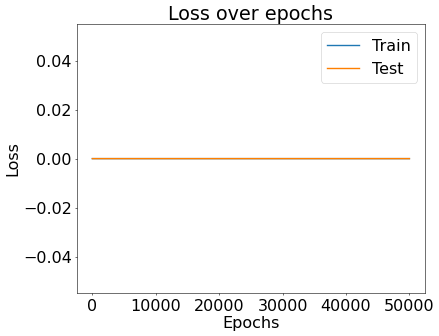

In [32]:
plt.title("Loss over epochs")
plt.plot(train_loss_list, label="Train")
plt.plot(test_loss_list, label="Test")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Finally, we visualize the results by plotting the ground truth Sigmoid function and the model's predictions on the same plot.

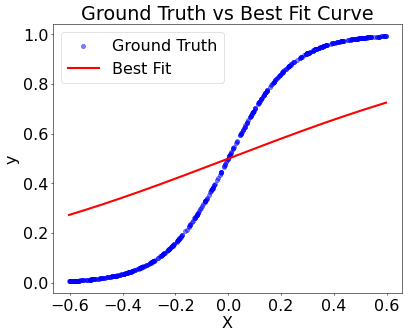

In [33]:
# Generate linspace for X_pred
X_pred = np.linspace(X_test.min(), X_test.max(), 1000)[:, None]

# Forecast the y values for X_pred using the trained network
y_pred = net.forward_pass(X_pred)

# Plot the ground truth and the best fit curve
plt.scatter(X_test, y_test, label='Ground Truth', color='blue', alpha=0.5)
plt.plot(X_pred, y_pred, label='Best Fit', color='red', lw=3)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Ground Truth vs Best Fit Curve')
plt.show()

In conclusion, you have learned how to build backpropagation from scratch using only NumPy. This careful dissection should provide you with a better understanding of how popular machine learning packages like PyTorch and TensorFlow work.

While these libraries offer powerful and optimized tools to build, train, and deploy complex neural networks, knowing the underlying principles and methods can be crucial in developing a solid foundation in machine learning. By learning how to implement backpropagation and neural networks from scratch, you can better appreciate the intricacies and challenges associated with training models, and also develop a more intuitive understanding of various aspects of the training process.

Remember, it's not just about using powerful tools; it's about understanding the fundamental concepts that make them so powerful. Now that you have a deeper insight into backpropagation and neural networks, you are better equipped to leverage the full potential of machine learning packages like PyTorch and TensorFlow in your future projects. Happy learning!